In [5]:
import numpy as np
import plotly.express as px
import pandas as pd
import statistics
from statistics import mode
import matplotlib.pyplot as plt
import matplotlib.pyplot

In [9]:
from scipy import stats 
from collections import Counter 
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sn
from pandas import Series, DataFrame
import pandas as pd
import json

In [6]:
URL="/content/trabalho 2 segundo semestre - SpotifyFeatures.csv"

In [7]:
musicas_ouvidas = pd.read_csv(URL) 
display (musicas_ouvidas)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,611,389.00,99373.0,0.91,0,C#,346.00,-1.828,Major,525.0,166.969,4/4,814.00
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,246,0.59,137373.0,737.00,0,F#,151.00,-5.559,Minor,868.0,174.003,4/4,816.00
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,952,663.00,170267.0,131.00,0,C,103.00,-13.879,Minor,362.0,99.488,5/4,368.00
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,703,0.24,152427.0,326.00,0,C#,985.00,-12.178,Major,395.0,171.758,4/4,227.00
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95,331.00,82625.0,225.00,123,F,202.00,-21.150,Major,456.0,140.576,4/4,0.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95857,Indie,Halsey,Empty Gold,6oNDJSnkY0O4UIcgU8kwyz,57,677.0,447.00,207410.0,805.00,0,C#,0.27,-3.971,Minor,397.0,143.986,4/4,218.00
95858,Indie,Bazanji,Lights Go Down,6rUhIu9xmseaOvIXNZKp4X,59,92.0,803.00,185294.0,702.00,0,D,948.00,-7.578,Major,194.0,136.003,4/4,0.10
95859,Indie,Ravyn Lenae,Free Room (feat. Appleby),3HEn14GqygLCNfroOnYiZb,62,729.0,778.00,217013.0,465.00,557,E,107.00,-7.662,Major,318.0,120.172,4/4,386.00
95860,Indie,Fleurie,Soldier,1gzXHWAGYKbaHubERNp0Ox,57,295.0,603.00,225347.0,299.00,533,A,294.00,-10.816,Minor,297.0,83.975,4/4,395.00


In [ ]:
musicas_ouvidas.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0.0,611,389.00,99373.0,0.91,0,C#,346.0,-1.828,Major,525.0,166.969,4/4,814.00
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1.0,246,0.59,137373.0,737.00,0,F#,151.0,-5.559,Minor,868.0,174.003,4/4,816.00
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3.0,952,663.00,170267.0,131.00,0,C,103.0,-13.879,Minor,362.0,99.488,5/4,368.00
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0.0,703,0.24,152427.0,326.00,0,C#,985.0,-12.178,Major,395.0,171.758,4/4,227.00
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4.0,0.95,331.00,82625.0,225.00,123,F,202.0,-21.150,Major,456.0,140.576,4/4,0.39


In [ ]:
musicas_ouvidas.head(n=6)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0.0,611,389.00,99373.0,0.91,0,C#,346.0,-1.828,Major,525.0,166.969,4/4,814.00
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1.0,246,0.59,137373.0,737.00,0,F#,151.0,-5.559,Minor,868.0,174.003,4/4,816.00
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3.0,952,663.00,170267.0,131.00,0,C,103.0,-13.879,Minor,362.0,99.488,5/4,368.00
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0.0,703,0.24,152427.0,326.00,0,C#,985.0,-12.178,Major,395.0,171.758,4/4,227.00
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4.0,0.95,331.00,82625.0,225.00,123,F,202.0,-21.150,Major,456.0,140.576,4/4,0.39
5,Movie,Henri Salvador,Le petit souper aux chandelles,0Mf1jKa8eNAf1a4PwTbizj,0.0,749,578.00,160627.0,948.00,0,C#,107.0,-14.970,Major,143.0,87.479,4/4,358.00


In [ ]:
musicas_ouvidas.tail()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
110489,Pop,Ariana Grande,Honeymoon Avenue,2ofOe2OaXFpZF5ETbsc7Qu,63.0,214,685.0,339733.0,607.0,0,B,345.00,-5.301,Major,431.0,125.011,4/4,455.0
110490,Pop,Eli Young Band,Love Ain't,6uVzeU47Qzg0rrMneP5BNg,70.0,566,0.6,186119.0,851.0,9.78e-06,B,891.00,-4.645,Major,388.0,98.007,4/4,727.0
110491,Pop,Lewis Capaldi,Grace,4eQBL0cuF3ismYCzBff2Ii,78.0,0.49,733.0,184880.0,533.0,0,E,171.00,-6.971,Major,357.0,104.506,4/4,483.0
110492,Pop,PnB Rock,Issues (feat. Russ),1ysDVWxBj5Set0fA05TcyP,65.0,203,655.0,232857.0,642.0,2.3e-05,A,0.11,-6.758,Major,729.0,83.974,4/4,208.0
110493,Pop,TOMORROW X TOGETHER,Our Summer,3qbHA5vvQj249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
musicas_ouvidas.dropna(inplace=True)

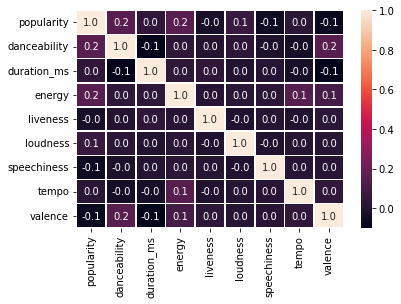

In [10]:
correlation = musicas_ouvidas.corr()
plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

In [11]:
correlacao = musicas_ouvidas.corr()
print (correlacao)

              popularity  danceability  duration_ms    energy  liveness  \
popularity      1.000000      0.152220     0.041495  0.155027 -0.027479   
danceability    0.152220      1.000000    -0.094162  0.033578  0.006864   
duration_ms     0.041495     -0.094162     1.000000  0.037628  0.040447   
energy          0.155027      0.033578     0.037628  1.000000  0.019591   
liveness       -0.027479      0.006864     0.040447  0.019591  1.000000   
loudness        0.067329      0.026209     0.001645  0.023821 -0.000841   
speechiness    -0.058077     -0.017235     0.011017  0.026716  0.014397   
tempo           0.023592     -0.035884    -0.028103  0.147392 -0.002940   
valence        -0.067570      0.150137    -0.099608  0.100904  0.031199   

              loudness  speechiness     tempo   valence  
popularity    0.067329    -0.058077  0.023592 -0.067570  
danceability  0.026209    -0.017235 -0.035884  0.150137  
duration_ms   0.001645     0.011017 -0.028103 -0.099608  
energy        0.0

In [12]:
media = musicas_ouvidas.mean()
print(media)

popularity          41.281916
danceability       517.004027
duration_ms     231196.466749
energy             550.283085
liveness           351.778100
loudness           -10.015911
speechiness        378.560988
tempo              120.254612
valence            451.208259
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [13]:
moda = musicas_ouvidas.mode()
print(moda)

        genre     artist_name track_name                track_id  popularity  \
0  Electronic  Giuseppe Verdi       Home  2Ud3deeqLAG988pfW0Kwcl         0.0   
1         NaN             NaN        NaN  3R73Y7X53MIQZWnKloWq5i         NaN   
2         NaN             NaN        NaN  4RKXPNzSNfrlgcCrksmauL         NaN   
3         NaN             NaN        NaN  53PkA8aXiwH4ppa0V0iO7o         NaN   
4         NaN             NaN        NaN  6TFUZ8Bt1brEwomY90SKXi         NaN   

  acousticness  danceability  duration_ms  energy instrumentalness  key  \
0          107         529.0     240000.0    0.72                0    C   
1          NaN           NaN          NaN     NaN              NaN  NaN   
2          NaN           NaN          NaN     NaN              NaN  NaN   
3          NaN           NaN          NaN     NaN              NaN  NaN   
4          NaN           NaN          NaN     NaN              NaN  NaN   

   liveness  loudness   mode  speechiness    tempo time_signature  v

In [14]:
mediana = musicas_ouvidas.median()
print(mediana)

popularity          45.000
danceability       559.000
duration_ms     221280.000
energy             589.000
liveness           221.000
loudness            -7.411
speechiness        356.000
tempo              119.949
valence            443.000
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [21]:
!pip install TPOT

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 87 kB 2.9 MB/s 
     |████████████████████████████████| 139 kB 34.2 MB/s 
     |████████████████████████████████| 255.9 MB 33 kB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11953 sha256=5b907339ee2ba706580deca974173ddca4a32824b2b0b2f482617db31426e416
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [25]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import os
from tpot import TPOTRegressor
import pandas as pd

In [38]:
y= musicas_ouvidas["popularity"]


In [39]:
X= musicas_ouvidas[["duration_ms","energy","instrumentalness"]]

In [40]:
X

,duration_ms,energy,instrumentalness
0,99373.0,0.91,0
1,137373.0,737.00,0
2,170267.0,131.00,0
3,152427.0,326.00,0
4,82625.0,225.00,123
...,...,...,...
95856,193747.0,662.00,0
95857,207410.0,805.00,0
95858,185294.0,702.00,0
95859,217013.0,465.00,557


In [41]:
y

0         0
1         1
2         3
3         0
4         4
         ..
95856    59
95857    57
95858    59
95859    62
95860    57
Name: popularity, Length: 95861, dtype: int64